<a href="https://colab.research.google.com/github/gabgmont/QuarentenaDados/blob/master/Aula%2005/Aula_05_anota%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Para essa aula será carregada a base de dados do ENEM 2018.

In [1]:
import pandas as pd

#O código abaixo irá definir a precisar com que o pandas irá mostrar os dados, para apenas duas casas decimais.
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

dados = pd.read_csv('https://github.com/gabgmont/QuarentenaDados/blob/master/Aula%2004/enem-2018-master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true')
dados

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137839,180012079549,2018,4202305,Biguaçu,42,SC,21.00,F,0.00,1,1,"4,205,407.00",Florianópolis,42.00,SC,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,D,B,B,3,E,A,B,C,B,A,B,A,A,A,B,A,B,B,A,B,C,A,A,B,A,A
137840,180008900183,2018,2111300,São Luís,21,MA,22.00,F,0.00,1,1,"2,111,300.00",São Luís,21.00,MA,1,2,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ACDEDBADBDACACECBBBDECABDADBCAEACABDCEBCEBCBD,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAA

In [2]:
#Importante ressaltar que o método describe() mostra somente as colunas em que é possível calcular a média, mediana, etc.
#Colunas com variáveis do tipo string por exemplo não aparecem na descrição.
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [3]:
#Podemos checar o nome de todas as colunas do Dataframe, já que ele é bem grande.
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

Podemos analisar as notas das provas que são fornecidas pelo Dataset. Talvez seja possível encontrar alguma correlação entre elas, como por exemplo, se um candidato vai bem em uma matéria, ele tende a ir bem em uma outra matéria?

In [4]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'] #Separa somente as colunas de notas das provas.
dados_notas = dados[colunas_de_notas].dropna() #Tira todos os linhas que contenham NaN como informação em alguma das colunas.
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao'] # renomeia as colunas para ficar mais amigavel à leitura
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


Agora que temos as informações relevantes separadas no dataframe de dados_notas, podemos calcular a correlação entre elas:

In [5]:
corr_notas = dados_notas.corr()
corr_notas

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Nessa tabela de correlações podemos presumir várias hipóteses, como por exemplo, a correlação entre "linguagem_codigo" em relação a "ciencias_humanas" é de 0.7. A maior de todas. Portanto podemos pensar que o candidato que vai bem em uma das duas matérias, tende a ir melhor na outra.

Outro ponto apotantado na aula é que a correlação entre "linguagem_codigo" e as demais matérias é sempre maior, e isso pode nos levar a pensar que o aluno que estuda e vai bem nessa materia tende a ir melhor que os outros. Isso é só uma hipótese, porém pode ser o inicio de um estudo mais detalhado, ao pegar por exemplo uma base de dados maior, e começar a compara-las com outras bases de outros anos.

Podemos plotar a correlação das variáveis em alguns gráficos para facilitar a visualização dos dados, alguns dos gráficos usados durante a aula foram:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


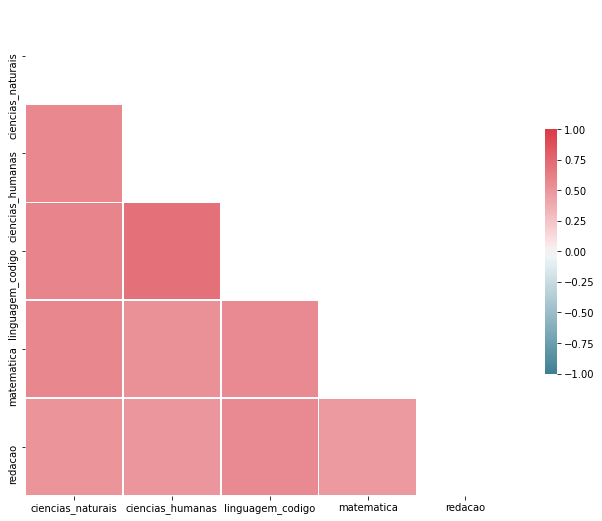

In [6]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Máscara que retira o triangulo de cima do gráfico
mask = np.triu(np.ones_like(corr_notas, dtype=np.bool))

# Inicia a figura no matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gera um mapa de cores personalizado
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Desenha o mapa de calor com a mascara e o mapa de cores definido
sns.heatmap(corr_notas, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

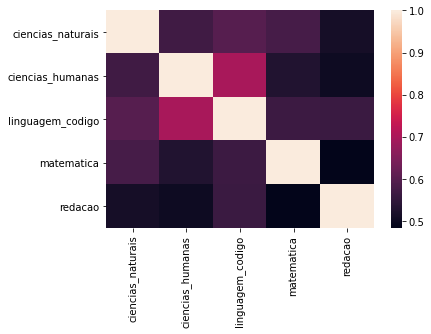

In [7]:
sns.heatmap(corr_notas)

Esses gráficos ficaram longe de serem perfeitos, porém podem ser aperfeiçoados de várias formas para termos uma visualização excelente desses dados.

Agora, para podermos prosseugir e criar um modelo de machine learning que irá tentar prever as notas de alunos, baseados em outras notas que ele obteve, precisamos analisar a distribuição dos gráficos e tentar encontrar alguma tendência nessas informações.

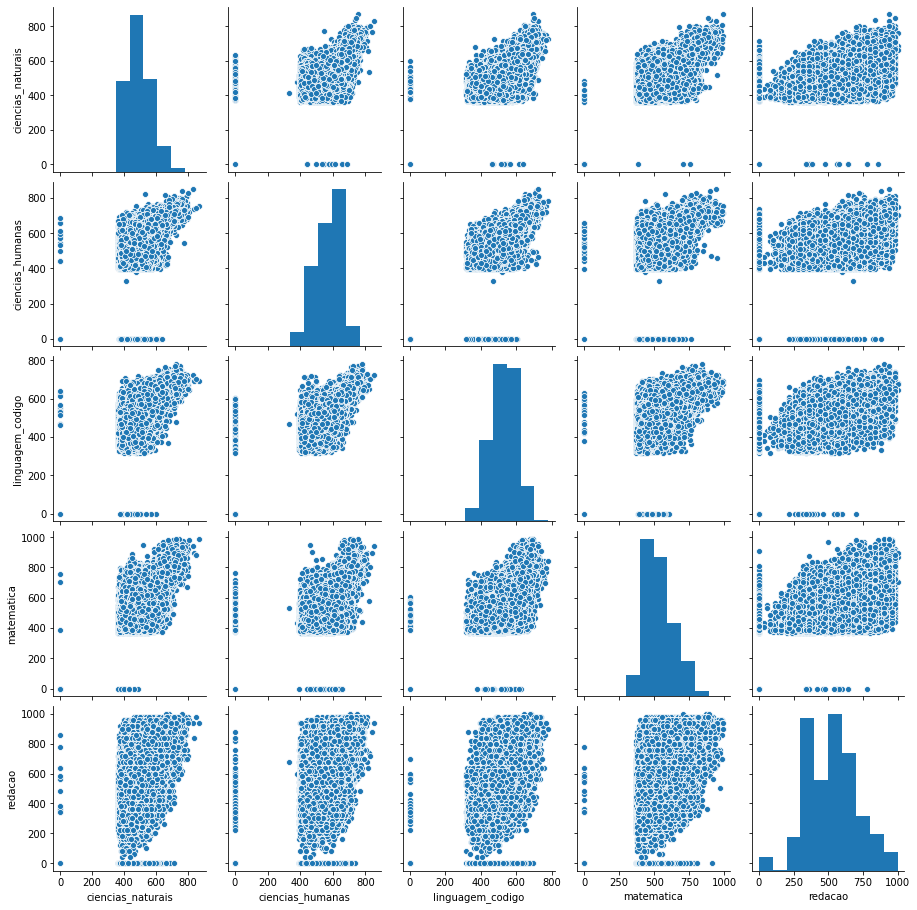

In [8]:
sns.pairplot(dados_notas)

Mesmo que boa parte das relações estão com a distribução quase que aleatória, em algumas delas podemos perceber uma certa tendencia, onde uma determinada nota cresce conforme a outra cresce. São esse tipo de informação que serão mais usadas ao criar um modelo de machine Learning.

#Desafios

**Desafio 1:** Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?



In [0]:
#colunas_de_notas_e_presenca_CN = ['NU_NOTA_CN', 'TP_PRESENCA_CN']
#colunas_de_notas_e_presenca_CH = ['NU_NOTA_CH', 'TP_PRESENCA_CH']
#colunas_de_notas_e_presenca_LC = ['NU_NOTA_LC', 'TP_PRESENCA_LC']
#colunas_de_notas_e_presenca_MT = ['NU_NOTA_MT', 'TP_PRESENCA_MT']
                               
#dados_presenca_CN = dados[colunas_de_notas_e_presenca_CN]
#dados_presenca_CH = dados[colunas_de_notas_e_presenca_CH]
#dados_presenca_LC = dados[colunas_de_notas_e_presenca_LC]
#dados_presenca_MT = dados[colunas_de_notas_e_presenca_MT]

In [71]:
colunas_de_notas_e_presenca = ['NU_INSCRICAO','NU_NOTA_CN', 'TP_PRESENCA_CN','NU_NOTA_CH', 'TP_PRESENCA_CH', 'NU_NOTA_LC', 'TP_PRESENCA_LC','NU_NOTA_MT', 'TP_PRESENCA_MT']

dados_presenca = dados[colunas_de_notas_e_presenca]
dados_presenca

,NU_INSCRICAO,NU_NOTA_CN,TP_PRESENCA_CN,NU_NOTA_CH,TP_PRESENCA_CH,NU_NOTA_LC,TP_PRESENCA_LC,NU_NOTA_MT,TP_PRESENCA_MT
0,180009327796,nan,0.00,nan,0.00,nan,0.00,nan,0.00
1,180012890374,523.10,1.00,671.30,1.00,661.60,1.00,738.00,1.00
2,180008223824,409.20,1.00,531.70,1.00,389.00,1.00,438.10,1.00
3,180007859645,452.30,1.00,505.50,1.00,448.50,1.00,544.90,1.00
4,180013499517,nan,0.00,nan,0.00,nan,0.00,nan,0.00
...,...,...,...,...,...,...,...,...,...
137839,180012079549,nan,0.00,nan,0.00,nan,0.00,nan,0.00
137840,180008900183,382.40,1.00,534.20,1.00,468.10,1.00,576.40,1.00
137841,180013130388,nan,0.00,nan,0.00,nan,0.00,nan,0.00
137842,180009618129,452.70,1.00,509.30,1.00,527.70,1.00,591.40,1.00


In [72]:
faltou = 0
presente = 1
eliminado = 2

dados_presenca.loc[dados['TP_PRESENCA_CN'].isin([faltou, eliminado]), 'NU_NOTA_CN'] = 0
dados_presenca.loc[dados['TP_PRESENCA_CH'].isin([faltou, eliminado]), 'NU_NOTA_CH'] = 0 
dados_presenca.loc[dados['TP_PRESENCA_LC'].isin([faltou, eliminado]), 'NU_NOTA_LC'] = 0 
dados_presenca.loc[dados['TP_PRESENCA_MT'].isin([faltou, eliminado]), 'NU_NOTA_MT'] = 0 

dados_presenca

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,NU_INSCRICAO,NU_NOTA_CN,TP_PRESENCA_CN,NU_NOTA_CH,TP_PRESENCA_CH,NU_NOTA_LC,TP_PRESENCA_LC,NU_NOTA_MT,TP_PRESENCA_MT
0,180009327796,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,180012890374,523.10,1.00,671.30,1.00,661.60,1.00,738.00,1.00
2,180008223824,409.20,1.00,531.70,1.00,389.00,1.00,438.10,1.00
3,180007859645,452.30,1.00,505.50,1.00,448.50,1.00,544.90,1.00
4,180013499517,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
137839,180012079549,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
137840,180008900183,382.40,1.00,534.20,1.00,468.10,1.00,576.40,1.00
137841,180013130388,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
137842,180009618129,452.70,1.00,509.30,1.00,527.70,1.00,591.40,1.00


**Desafio 2:** A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.



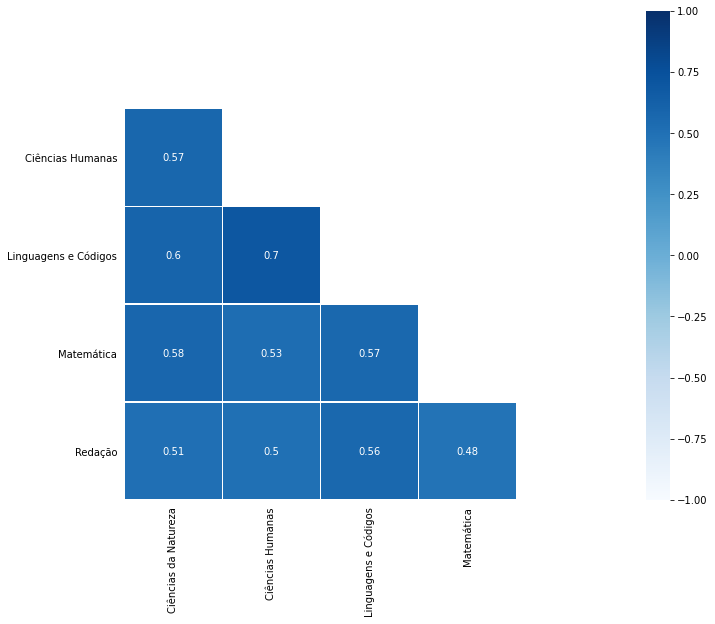

In [67]:
mask = np.triu(np.ones_like(corr_notas, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

labelsx = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', '']
labelsy = ['', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

sns.heatmap(corr_notas, 
            mask=mask, 
            cmap= 'Blues', 
            vmax=1, 
            vmin=-1,  
            linewidths=.5, 
            annot = True,
            xticklabels=labelsx,
            yticklabels=labelsy)

**Desafio 3:** Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas



In [140]:
cn_mask = ['NU_INSCRICAO', 'TX_RESPOSTAS_CN', 'TX_GABARITO_CN']
ch_mask = ['NU_INSCRICAO', 'TX_RESPOSTAS_CH', 'TX_GABARITO_CH']
lc_mask = ['NU_INSCRICAO', 'TX_RESPOSTAS_LC', 'TX_GABARITO_LC'] 
mt_mask = ['NU_INSCRICAO', 'TX_RESPOSTAS_MT', 'TX_GABARITO_MT']
resp_gab_cn = dados[cn_mask].dropna()
resp_gab_ch = dados[ch_mask].dropna()
resp_gab_lc = dados[lc_mask].dropna()
resp_gab_mt = dados[mt_mask].dropna()

resp_gab_ch

,NU_INSCRICAO,TX_RESPOSTAS_CH,TX_GABARITO_CH
1,180012890374,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD
2,180008223824,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE
3,180007859645,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE
6,180009943059,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE
8,180008290373,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD
...,...,...,...
137835,180013566986,CEBCAABDACDEBEADCAADBBEBEEECEABADAEBBCBCABDAA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD
137836,180009553778,EABBCBDEDBBABECACEECBEDADCCADDBCEABDBDADCBBAD,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE
137838,180007872862,ECBAEEAEDAEDCBEEEECEADADCDCECDCEAEDCEEBAAEDEC,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE
137840,180008900183,BAABCDBBAAEDBAADDBCBCDCBDDEDBCABBCABBCCBBAACB,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD


In [0]:
def conta_acertos(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')

    if (type(respostas) != str or type(gabarito) != str):
        return 0

    return sum(a==b for a, b in zip(respostas, gabarito))

In [142]:
dados_presenca['NU_ACERTOS_CN'] = resp_gab_cn.apply(conta_acertos, materia = 'CN', axis=1)
dados_presenca['NU_ACERTOS_CH'] = resp_gab_ch.apply(conta_acertos, materia = 'CH', axis=1)
dados_presenca['NU_ACERTOS_LC'] = resp_gab_lc.apply(conta_acertos, materia = 'LC', axis=1)
dados_presenca['NU_ACERTOS_MT'] = resp_gab_mt.apply(conta_acertos, materia = 'MT', axis=1)

dados_presenca

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,NU_INSCRICAO,NU_NOTA_CN,TP_PRESENCA_CN,NU_NOTA_CH,TP_PRESENCA_CH,NU_NOTA_LC,TP_PRESENCA_LC,NU_NOTA_MT,TP_PRESENCA_MT,NU_ACERTOS_CN,NU_ACERTOS_CH,NU_ACERTOS_LC,NU_ACERTOS_MT
0,180009327796,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan
1,180012890374,523.10,1.00,671.30,1.00,661.60,1.00,738.00,1.00,11.00,27.00,33.00,22.00
2,180008223824,409.20,1.00,531.70,1.00,389.00,1.00,438.10,1.00,8.00,9.00,8.00,6.00
3,180007859645,452.30,1.00,505.50,1.00,448.50,1.00,544.90,1.00,7.00,10.00,11.00,10.00
4,180013499517,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137839,180012079549,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan
137840,180008900183,382.40,1.00,534.20,1.00,468.10,1.00,576.40,1.00,7.00,11.00,13.00,13.00
137841,180013130388,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan
137842,180009618129,452.70,1.00,509.30,1.00,527.70,1.00,591.40,1.00,10.00,11.00,15.00,13.00


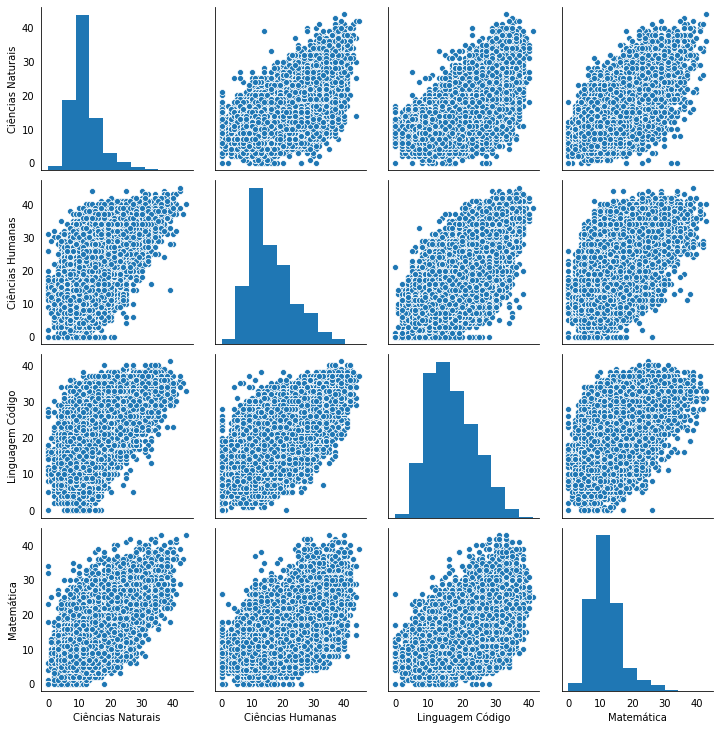

In [143]:
acertos = ['NU_ACERTOS_CN','NU_ACERTOS_CH', 'NU_ACERTOS_LC', 'NU_ACERTOS_MT']
numero_acertos = dados_presenca[acertos]
numero_acertos.columns = ['Ciências Naturais', 'Ciências Humanas', 'Linguagem Código', 'Matemática']
sns.pairplot(numero_acertos)

**Desafio 4:** Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.



In [0]:
def dropzero(aluno, materia):
    nota_aluno = aluno.get(f'NU_NOTA_{materia}')

    if (nota_aluno == 0):
      return np.nan

    return nota_aluno

In [145]:
dados_nota_2 = dados[colunas_de_notas_e_presenca].dropna()

dados_nota_sem_0 = dados_nota_2.copy()
dados_nota_sem_0['NU_NOTA_CN'] = dados_nota_2.apply(dropzero, materia='CN', axis=1)
dados_nota_sem_0['NU_NOTA_CH'] = dados_nota_2.apply(dropzero, materia='CH', axis=1)
dados_nota_sem_0['NU_NOTA_LC'] = dados_nota_2.apply(dropzero, materia='LC', axis=1)
dados_nota_sem_0['NU_NOTA_MT'] = dados_nota_2.apply(dropzero, materia='MT', axis=1)

dados_nota_sem_0.sort_values('NU_NOTA_CN')

,NU_INSCRICAO,NU_NOTA_CN,TP_PRESENCA_CN,NU_NOTA_CH,TP_PRESENCA_CH,NU_NOTA_LC,TP_PRESENCA_LC,NU_NOTA_MT,TP_PRESENCA_MT
2857,180009499219,362.50,1.00,593.40,1.00,396.90,1.00,380.40,1.00
44238,180013874469,362.50,1.00,635.10,1.00,520.50,1.00,nan,1.00
28232,180009123349,362.50,1.00,578.60,1.00,409.10,1.00,370.30,1.00
128120,180009888283,362.50,1.00,669.20,1.00,477.20,1.00,499.00,1.00
71793,180007501641,362.50,1.00,549.70,1.00,504.20,1.00,426.00,1.00
...,...,...,...,...,...,...,...,...,...
91881,180008350002,nan,1.00,658.80,1.00,615.90,1.00,nan,1.00
107725,180013119188,nan,1.00,534.10,1.00,532.60,1.00,nan,1.00
118741,180010487386,nan,1.00,686.50,1.00,640.00,1.00,754.60,1.00
119585,180009067914,nan,1.00,441.00,1.00,462.90,1.00,704.20,1.00


In [146]:
dados_nota_sem_0 = dados_nota_sem_0.dropna()
dados_nota_sem_0.sort_values('NU_NOTA_CN')

,NU_INSCRICAO,NU_NOTA_CN,TP_PRESENCA_CN,NU_NOTA_CH,TP_PRESENCA_CH,NU_NOTA_LC,TP_PRESENCA_LC,NU_NOTA_MT,TP_PRESENCA_MT
71793,180007501641,362.50,1.00,549.70,1.00,504.20,1.00,426.00,1.00
28232,180009123349,362.50,1.00,578.60,1.00,409.10,1.00,370.30,1.00
128120,180009888283,362.50,1.00,669.20,1.00,477.20,1.00,499.00,1.00
2857,180009499219,362.50,1.00,593.40,1.00,396.90,1.00,380.40,1.00
120201,180009540704,362.60,1.00,542.00,1.00,511.70,1.00,532.30,1.00
...,...,...,...,...,...,...,...,...,...
33520,180013809317,807.10,1.00,719.20,1.00,644.00,1.00,982.50,1.00
96734,180009979706,831.40,1.00,850.40,1.00,725.90,1.00,943.20,1.00
106298,180009960152,836.30,1.00,735.90,1.00,692.70,1.00,896.50,1.00
132198,180011926158,848.10,1.00,740.40,1.00,702.30,1.00,880.70,1.00


**Desafio 5:** Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)



In [0]:
def corrige_questoes(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')
    
    return pd.Series([int(a==b) for a, b in zip(respostas, gabarito)])

In [148]:
prova_cn_azul = dados.query('CO_PROVA_CN == 447')

matriz_acertos = prova_cn_azul.apply(corrige_questoes, materia='CN', axis=1)
matriz_acertos

# A função retorna uma matriz pois é aplicada em cada coluna do df, e em cada uma delas ele retorna uma serie.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
10,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
15,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
137808,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0
137821,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0
137834,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


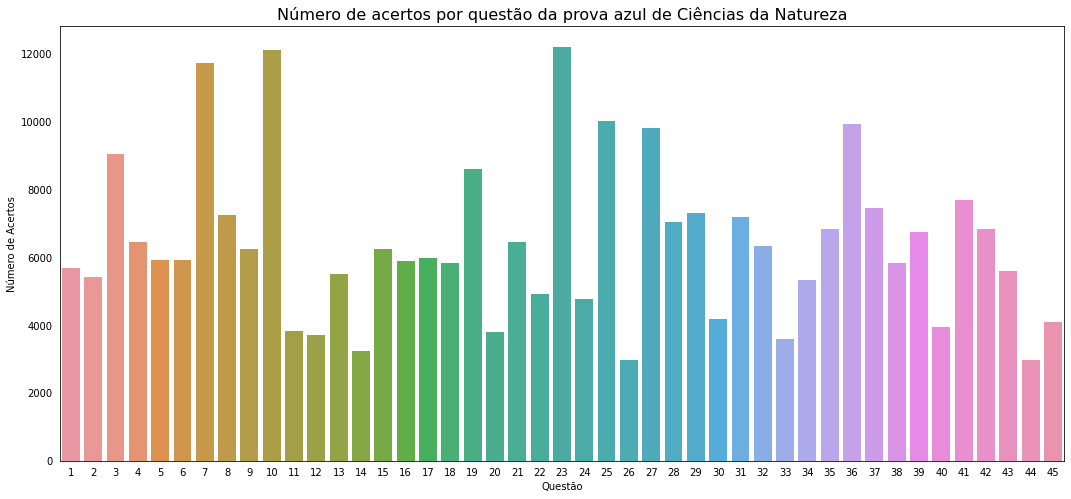

In [149]:
total_acertos_por_questao = pd.DataFrame(matriz_acertos.sum())
total_acertos_por_questao.reset_index(inplace=True)
total_acertos_por_questao.columns = ['Questão', 'Número de Acertos']
total_acertos_por_questao['Questão'] = total_acertos_por_questao['Questão'] + 1

plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Questão', y='Número de Acertos', data=total_acertos_por_questao)

ax.set_title('Número de acertos por questão da prova azul de Ciências da Natureza', fontsize=16)

plt.show()

Desafio 6: Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.



#**Aula 5**

A aula 5 dará inicio ao processo de se criar um modelo de machine learning, separando os dados que serão testados para depois conseguirmos prever algumas coisas.

"x" geralmente é o nome da varíavel utilizada nas amostras de treino, que servirão para treinarmos o modelo a prever certos resultados.

A abordagem vem das funções em algebra. Por exemplo "f(x) = y". Nós passaremos um valor x, que o modelo tentará prever e retornar um valor y como resultado da predição.

In [156]:
#['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']

x = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00
...,...,...,...,...
137835,511.50,606.90,513.40,520.00
137836,465.00,546.80,462.80,580.00
137838,576.20,610.40,486.80,820.00
137840,382.40,534.20,576.40,380.00


Tentaremos prever as notas de Linguagem e Código com base nas demais notas do candidato.

In [158]:
y = dados_notas['linguagem_codigo']
y

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

Como dito antes, para a máquina conseguir prever um resultado, ela precisa ser treinada. Assim ela consegue determinar algum tipo de padrão entre as notas, e tentará segui-lo quando fizer alguma predição para a nota de linguagem e código.

Neste caso, não poderemos treinar todo o conjunto de notas, pois assim não teriamos mais dados concretos para comparar os resultados das predições, então serão separadas duas amostras, uma de treino e uma de teste, assim podemos treinar o algoritimo, e depois testa-los com valores que ainda não foram vistos pela máquina.

Uma biblioteca muito usada é o SciKit Learn, ela possui vários algoritimos e métodos prontos que utilizamos para vários objetivos diferentes ao trabalhar com machine learning.
O primeiro que será usado é o "train_test_split", que irá separar uma parte dos dados como amostra, e a outra como teste automaticamente.

In [175]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267) 
#Utilizamos um seed para manter as amostras definidas como fixas, pois por padrão, os resultados devolvidos para essas variáveis de treino são aleatórios cada vez que são chamadas.

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

#São separados cerca de 75% de amostras para treino e 25% para teste.

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [176]:
x_treino.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
30213,524.70,509.30,496.90,620.00
83439,501.40,609.00,532.00,460.00
56490,544.40,649.60,592.80,560.00
135214,415.70,541.20,461.60,560.00
55431,405.50,592.00,571.60,520.00


Após a separação dos dados, será necessário treinar o modelo que será usado para fazer as previsões.

O modelo que será utilizado inicialmente será o LinearSVR, que é um modelo de Regressão para machine learning. Existem outros modelos como o de classificação (usado para definir se algo se encaixa em determinada categoria), porém este não se encaixa na nossa análise, visto que tentaremos prever um numero, e não uma classe de algo.

Podemos usar o .fit( ), que irá introduzir as informações no modelo, e ele será treinado.

In [161]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

#O aviso de convergencia significa que "Ele não terminou" de convergir os dados. Poderiamos aumentar o numero de iterações para permitir que ele termine, porém é preciso cuidado
#ao fazer esse tipo de alteração para não causarmos um "overfit" no nosso modelo.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

###Depois de treinado, poderemos utilizar o método .predict( ) para prevermos os resultados.

In [177]:
#Passamos o valor de "x_teste" como parâmetro para o predict pois foi a amostra que separamos para realizar os testes.

predicoes_notas_linguagem = modelo.predict(x_teste)
predicoes_notas_linguagem[:5]

array([486.66331109, 540.37793322, 478.79488436, 452.0140805 ,
       533.06419739])

In [178]:
y_teste[:5]

41528   420.20
81918   545.60
22786   518.10
17935   539.20
70617   536.90
Name: linguagem_codigo, dtype: float64

Podemos também visualizr essas predições através de gráficos para termos uma representação gráfica da margem de erro.

Podemos por exemplo plotar um gráfico das respostas reais (y_teste) em relação as predições feitas (predicoes_notas_linguagem), onde poderemos ver por exemplo se o padrão da distribuição das notas das predições é próximo ao padrão de distribuição das notas reais.

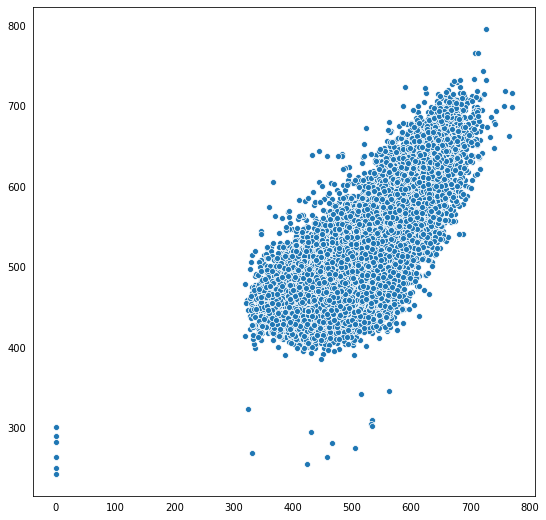

In [179]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

Um gráfico das respostas reais (y_teste), em relação ao erro da predição das notas (y_teste - predicoes_notas_linguagem), onde podemos ver o quanto nosso modelo ERRA em relação a cada faixa de nota, portanto o ideal seria aproximar o resultado de zero.

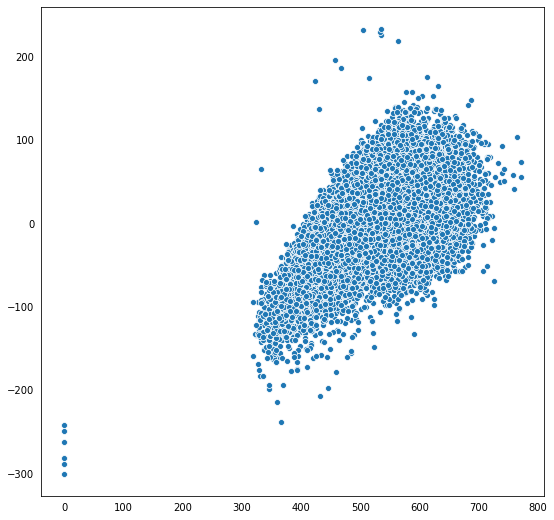

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste.values - predicoes_notas_linguagem)

E podemos também fazer uma comparação de quanto o nosso modelo é mais efeciente do que simplesmente comprar as notas com a média total delas ou com a mediana.

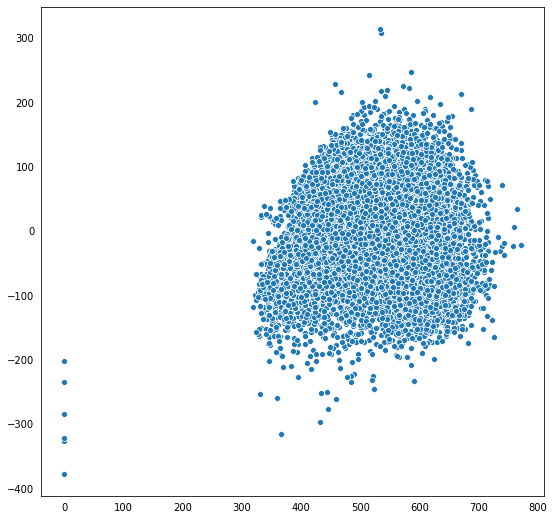

In [181]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - x_teste.mean(axis=1))

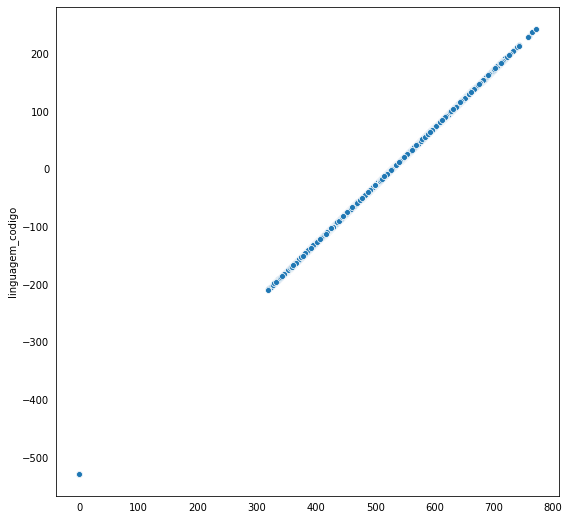

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=y_teste - y_treino.mean())

Outro modelo usado para machine learning é o modelo de decisão por "árvores" (DecisionTreeRegressor).

É utilizado da mesma forma que o LinearSVR, pois a construção desses modelos respeita um padrão, então os metodos utilizados em um, muito provavelmente poderão ser utilizados no outro também, como é o caso do ".fit( )", e do ".predict( )".

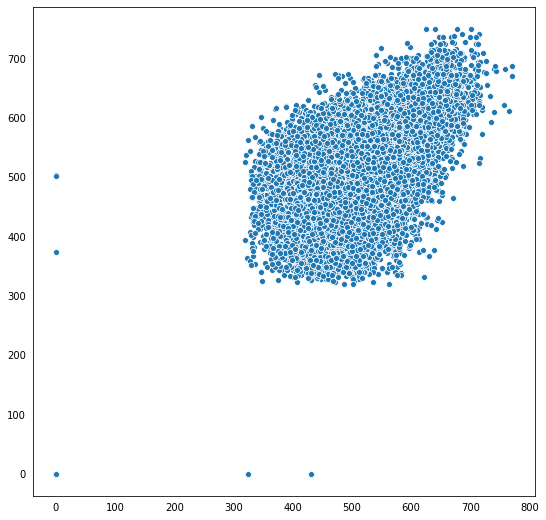

In [183]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_notas_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(9,9))
sns.scatterplot(x=y_teste.values, y=predicoes_notas_linguagem)

Podemos fazer também a comparação do modelo criado com os valores reais sobrepondo os gráficos. 

Colocando as notas de matemática no eixo x, podemos ver que o formato dos gráficos é bem parecido, porém as predições parecem estar "acolhendo" os valores reais, possívelmente pois os valores previstros pela máquina possuem um range maior do que os valores reais.

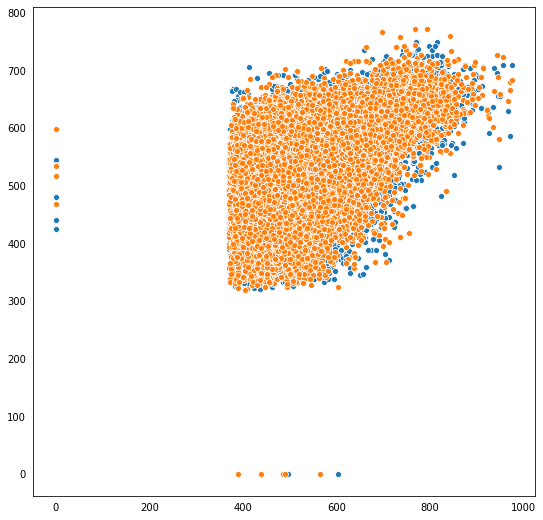

In [185]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_notas_linguagem) # plota primeiro (em baixo)
sns.scatterplot(x=x_teste['matematica'].values, y=y_teste.values)            # plota segundo (por cima)

a visualização gráfica dos modelos é boa para termos uma noção, porém fica dificil se comparar dois modelos parecidos quando comparados gráficamente.

Existem várias métricas utilizadas para medir a precisão do modelo, e uma delas é o **Erro quadrático médio**. Ele é medido elevando o erro de cada predição ao quadrado, e depois tirando a média entre todos eles, e é claro que a biblioteca 
Scikit Learn já tem o método preparado para utilizarmos:

In [186]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_notas_linguagem)

4156.93

Podemos ver que ao calcular o Erro quadrático médio entre dois valores igual, o resultado é zero (simulação caso a prediçao fosse exatamente o valor real), neste caso, quanto mais perto do zero estiver este valor, mais preciso será nosso modelo.

In [187]:
mean_squared_error(y_teste, y_teste)

0.00

Sabendo que quanto mais próximo ao zero melhor, precisamos também saber o quão ruim é o modelo, quanto mais afastado o valor está de zero. 4156 é um valor muito vago. Se um modelo bom for um modelo com o MSE (Mean Square Error) menor que 2000 por exemplo, nosso modelo é péssimo. Já se um modelo bom for um modelo o MSE menor que 6000, nosso modelo já se interessante e podemos trabalhar em refina-lo ainda mais.

Uma forma para compararmos inicialmente esse tipo de informação, é utilizar os métodos "Dummy" do sklearn. Eles fornecem meios de utilizar valores mais básicos para fazermos a comparação, como a média entre as notas por exemplo, e assim conseguimos calcular quão melhor o nosso modelo é do que apenas chutar o valor médio das provas.

In [188]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5193.54

O padrão do método "DummyRegressor" é utilizar a média das notas para fazer a previsão (Podemos consultar esse tipo de informação na documentação do SKLearn).

O valor do MSE foi 5193, portanto podemos concluir que o modelo utilizado (DecisionTreeRegressor) é mais eficiente para prever as notas do que simplesmente "chutar" a media das notas como resposta.

#Desafios
**Desafio 1:** Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.



**Desafio 2:** No gráfico em que plotamos a média com o valor previsto, plote a média das 4 notas ao invés de uma.



**Desafio 3:** Remover as notas zero e testar os mesmos modelos, comparando o resultado



**Desafio 4:** Interpretar tudo que foi feito e compartilhar suas conclusões



**Desafio 5:** Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

